# 역전파

# 문제1. Gradient 구하기

$Term1 \quad(z-y)[\;{\delta z\over \delta W1},\;{\delta z\over \delta W2},\;{\delta z\over \delta Wbias}] \quad (|y-z| < 1) $<br>
$Term2 \quad -[\;{\delta z\over \delta W1},\;{\delta z\over \delta W2},\;{\delta z\over \delta Wbias}] \qquad (|y-z| >= 1)$<br>


# 문제2. loss를 최소화하는 수식을 만들어보자.

<IPython.core.display.Javascript object>


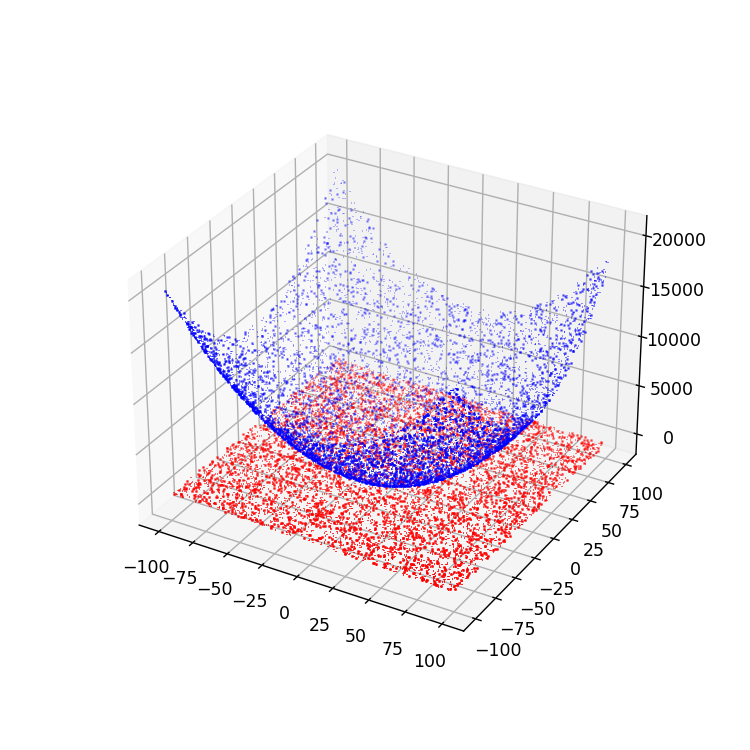

In [1]:
#수정하지 말 것

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def func(x,y):
    return (x-3)**2+(y-2)**2

def partial_derivative(func, tan_point,h=0.0001):
    x,y=tan_point
    df_dx= (func(x+h,y)-func(x,y))/h
    df_dy= (func(x,y+h)-func(x,y))/h
    return [df_dx,df_dy]

def lin_approx(xs,ys,func,tan_point):
    x,y= tan_point
    df_dx,df_dy=partial_derivative(func, [x,y])    
#     print("df_dx,df_dy",df_dx,df_dy)    
    return df_dx*(xs-x)+df_dy*(ys-y)+func(x,y)

def vis_approx_plane(x_range,y_range, func, tan_point):
    resolution=10000
    
    xs = np.array(np.random.uniform(*x_range, resolution))
    ys = np.array(np.random.uniform(*y_range, resolution))
    bias= np.array(np.ones(resolution))
    zs =func(xs,ys)
    
    ls =lin_approx(xs,ys,func,tan_point)+np.random.randn(resolution)
    plt.rcParams["figure.figsize"] = (6, 6)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, ls, c='r', marker='s', s=0.1, cmap='Greens')
    ax.scatter(xs, ys, func(xs,ys), c='b', marker='s', s=0.1, cmap='Greens')
    plt.show()
    return np.vstack([xs,ys,bias]).T,ls

data, labels =vis_approx_plane([-100,100],[-100,100],func,(1,1))




In [33]:
class FC:
    def __init__(self,w_in,w_out):
        self.W=np.random.uniform(low=-1.0,high=1.0,size=(w_in,w_out))
    
    def update_Weight(self, loss_w, alpha=0.001):
        """
        문제 2
        hint. assign 07에서 배웠던 알고리즘이 gradient descent에선 어떻게 작용할지 생각해보기
        또한 극솟값은 어떤식으로 찾아야할지 생각해보기
        """ 
        
        df_dx,df_dy = partial_derivative(func,loss_w)
        dz = df_dx + df_dy
        
    
    def __call__(self,x):        
        self.z = np.matmul(x, self.W.T)
        return self.z

class Model:
    def __init__(self):
        self.fc=FC(1,3)        
        
    def __call__(self, x):
        self.x= x
        self.z= self.fc(self.x)
        return self.z
    
    def update(self, y):
        """
        문제 2
        hint. FC객체를 Model에서 들고 있고
        결과의 output을 self.z가 들고 있다는 점을 이용하면 
        구현하기 쉬움
        """
        
        return y 
        
        

In [34]:
def train(num_epoch):
    for epoch in range(num_epoch):
        loss=0
        for i in range(len(data)):
            d, y= data[i], labels[i]
            y_pred=model(d)
            error= y-y_pred
            if np.abs(error)<1:
                loss+= 0.5*error**2
            else:
                loss+= np.abs(y-y_pred)-0.5
            model.update(y)
        print("loss는",loss/len(data),"입니다.")

def test():
    error=0
    for i in range(len(data)):
        d, y= data[i], labels[i]
        y_pred=model(d)
        error+=np.abs(y-y_pred)
    print("error:",error/len(data))
        

In [35]:
model= Model()
train(11)

loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.
loss는 [232.7611231] 입니다.


In [32]:
test()

error: [261.74128834]


## 고찰

In [ ]:
'''
1번 문제는 어려워서 질문도 했었고, 알 것 같았는데 돌아오니까 여전히 어려웠습니다.. 위에서 제가 생각한 대로 답을 적었지만 확신은
없었습니다. 그리고 1번 문제에서는 제 나름대로 gradient를 구했는데, 일반적인 경우(2번문제에서 처럼)에는 gradient를 어떻게 구하고,
구한 행렬을 어떻게 2번에 적용시키는지 1주일 동안 생각해 봤지만 생각해봤지만 문제를 풀지는 못했습니다. 그래서 이제는 이론 시간에 배운
내용을 더 공부해보고 문제 풀이를 보면서 복습해야겠다고 생각했습니다.


'''